# Predicting movie ratings<br>
> Objective: Predict the rating of movies based on features like generes and budget.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#importing the dataset
df = pd.read_csv("TMDB_movie_dataset_v11.csv")

The dataset is from Kaggle, collected from the movie and TV review platform <i>The Movie Database(TMDB)</i>.<br>
The dataset csv link: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies?resource=download

In [48]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160940 entries, 0 to 1160939
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1160940 non-null  int64  
 1   title                 1160927 non-null  object 
 2   vote_average          1160940 non-null  float64
 3   vote_count            1160940 non-null  int64  
 4   status                1160940 non-null  object 
 5   release_date          963469 non-null   object 
 6   revenue               1160940 non-null  int64  
 7   runtime               1160940 non-null  int64  
 8   adult                 1160940 non-null  bool   
 9   backdrop_path         306148 non-null   object 
 10  budget                1160940 non-null  int64  
 11  homepage              122479 non-null   object 
 12  imdb_id               608519 non-null   object 
 13  original_language     1160940 non-null  object 
 14  original_title        1160927 non-

In [50]:
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             197471
revenue                       0
runtime                       0
adult                         0
backdrop_path            854792
budget                        0
homepage                1038461
imdb_id                  552421
original_language             0
original_title               13
overview                 238837
popularity                    0
poster_path              371135
tagline                  998216
genres                   469878
production_companies     639447
production_countries     519306
spoken_languages         499423
keywords                 849125
dtype: int64

## Initial data cleaning<br>
>Removing rows with null values at critical columnn the "generes" columns. Dropping features without significant impact on the prediction of movie rating.

In [51]:
#dropping null rows with null values for: title, orignal title, genres
df = df.dropna(subset = ["genres","title", "release_date", "production_companies", "production_countries", "status"])

#dropping unnecessary columns
columns_to_drop = ["backdrop_path", "homepage", "imdb_id", 
                   "overview", "poster_path", "tagline","keywords", "spoken_languages", "original_title"]

df["release_date"] = pd.to_datetime(df["release_date"])

df = df.drop(columns = columns_to_drop)

#dropping duplicate rows

df = df.drop_duplicates()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355188 entries, 0 to 1160933
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    355188 non-null  int64         
 1   title                 355188 non-null  object        
 2   vote_average          355188 non-null  float64       
 3   vote_count            355188 non-null  int64         
 4   status                355188 non-null  object        
 5   release_date          355188 non-null  datetime64[ns]
 6   revenue               355188 non-null  int64         
 7   runtime               355188 non-null  int64         
 8   adult                 355188 non-null  bool          
 9   budget                355188 non-null  int64         
 10  original_language     355188 non-null  object        
 11  popularity            355188 non-null  float64       
 12  genres                355188 non-null  object        
 13  pro

In [53]:
#total remaining rows after purging
print(f"Total rows after dropping and {df.shape[0]}")

#checking if any null values are left over
print("\nNumber of null values in any of the columns")
df.isnull().sum()

Total rows after dropping and 355188

Number of null values in any of the columns


id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
popularity              0
genres                  0
production_companies    0
production_countries    0
dtype: int64

In [54]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America


In [55]:
print(df["genres"].unique())
print(df["production_companies"].unique())
print(df["production_countries"].unique())

['Action, Science Fiction, Adventure' 'Adventure, Drama, Science Fiction'
 'Drama, Action, Crime, Thriller' ...
 'Horror, Fantasy, Drama, Action, Thriller'
 'Horror, Mystery, Drama, Comedy' 'Music, Fantasy, Action, Comedy']
['Legendary Pictures, Syncopy, Warner Bros. Pictures'
 'Legendary Pictures, Syncopy, Lynda Obst Productions'
 'DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures'
 ... 'Oxford Television Company' 'Bacon, Viken Filmsenter'
 'The Big Fights, Inc.']
['United Kingdom, United States of America'
 'United States of America, United Kingdom' 'United States of America' ...
 'Belgium, Hungary, Portugal, Russia' 'Myanmar, Germany'
 'Greenland, United States of America']


In [56]:
#genres is stored as strings converting them to lists
df["genres"] = df["genres"].str.split(", ")

#production companies is stored as strings converting them to lists
df["production_companies"] = df["production_companies"].str.split(", ")

#production countries is stored as strings converting them to lists
df["production_countries"] = df["production_countries"].str.split(", ")

print(df["genres"].head(10))
print(df["production_companies"].head(10))
print(df["production_countries"].head(10))



0             [Action, Science Fiction, Adventure]
1              [Adventure, Drama, Science Fiction]
2                 [Drama, Action, Crime, Thriller]
3    [Action, Adventure, Fantasy, Science Fiction]
4             [Science Fiction, Action, Adventure]
5                      [Action, Adventure, Comedy]
6             [Adventure, Action, Science Fiction]
7                                          [Drama]
8             [Action, Science Fiction, Adventure]
9                                [Thriller, Crime]
Name: genres, dtype: object
0    [Legendary Pictures, Syncopy, Warner Bros. Pic...
1    [Legendary Pictures, Syncopy, Lynda Obst Produ...
2    [DC Comics, Legendary Pictures, Syncopy, Isobe...
3    [Dune Entertainment, Lightstorm Entertainment,...
4                                     [Marvel Studios]
5    [20th Century Fox, The Donners' Company, Genre...
6                                     [Marvel Studios]
7    [Regency Enterprises, Fox 2000 Pictures, Tauru...
8                     

In [57]:
df["status"].unique()

array(['Released', 'In Production', 'Planned', 'Post Production',
       'Canceled', 'Rumored'], dtype=object)

In [58]:
#removing movies with less than 1000 budget but some revenue

df = df[~((df['budget'] < 1000) & (df['revenue'] > 0))]

#removing movies with suspicious revenues for lower vote counts

df = df[~((df['vote_count'] <= 100) & (df['revenue'] > 1000000000))]

In [59]:
#film was invented in 1895 its not possible for movies to have been created before that

df = df[df['release_date'].dt.year >= 1895]

In [60]:
#final check before eda

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348855 entries, 0 to 1160933
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    348855 non-null  int64         
 1   title                 348855 non-null  object        
 2   vote_average          348855 non-null  float64       
 3   vote_count            348855 non-null  int64         
 4   status                348855 non-null  object        
 5   release_date          348855 non-null  datetime64[ns]
 6   revenue               348855 non-null  int64         
 7   runtime               348855 non-null  int64         
 8   adult                 348855 non-null  bool          
 9   budget                348855 non-null  int64         
 10  original_language     348855 non-null  object        
 11  popularity            348855 non-null  float64       
 12  genres                348855 non-null  object        
 13  pro

## EDA task

1. Feature Relationships and Trends

In [61]:
#budget vs revenue

#movies can only generate revenues if they are released so excluding unreleased films for this section

df_released = df[df["status"] == "Released"].copy()

df_released["profit"] = df_released["revenue"] - df_released["budget"]

most_profitable = df_released.nlargest(10, "profit")[["title", "budget", "revenue"]]

least_profitable = df_released.nsmallest(10, "profit")[["title", "budget", "revenue"]]

Top 10 most profitable movies.

In [62]:
print(most_profitable)

                            title     budget     revenue
3                          Avatar  237000000  2923706026
15              Avengers: Endgame  356000000  2800000000
17                        Titanic  200000000  2264162353
282      Avatar: The Way of Water  460000000  2320250281
56   Star Wars: The Force Awakens  245000000  2068223624
6          Avengers: Infinity War  300000000  2052415039
57        Spider-Man: No Way Home  200000000  1921847111
44                 Jurassic World  150000000  1671537444
317                 The Lion King  260000000  1663075401
271                     Furious 7  190000000  1515341399


The 10 least profitable movies

In [63]:
print(least_profitable)

                               title     budget   revenue
432975                          Enea  888000000         0
1431                    The Gray Man  200000000    454023
201074                    Messengers  200000000   5224221
37944     Ninguém Entra, Ninguém Sai  193274344         0
1596                The Tomorrow War  200000000  14400000
1858    Mowgli: Legend of the Jungle  175000000         0
938                      Turning Red  190000000  18879922
906135    Killers of the Flower Moon  170000000         0
806                       Red Notice  160000000    178143
612                     The Irishman  159000000    968853


Movies like The Irishman, despite being critically acclaimed, often report low revenue due to the increasing trend of films being released on streaming services like Netflix shortly after their theatrical release. The Movie Database (TMDb) dataset, which focuses on theatrical revenue, doesn't fully capture the financial success of films that have significant earnings from streaming platforms.

C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\1968398281.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('runtime_category')['vote_average'].plot(kind='hist', alpha=0.6, bins=20, legend=True)


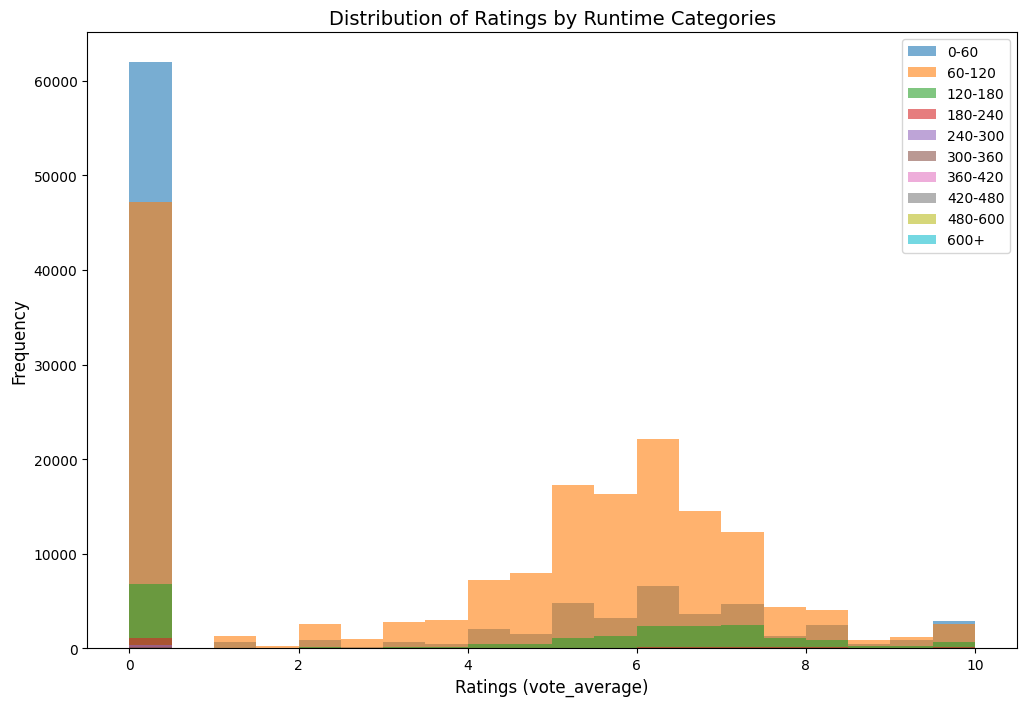

In [64]:
#runtime vs ratings

#movies need to be released first so they can have ratings, so using the same df_released dataframe in this section as well

df_filtered = df_released[(df_released['runtime'] <= 1000) & (df_released['runtime'] > 0)].copy()

bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 600, 1000]
labels = ['0-60', '60-120', '120-180', '180-240', '240-300', '300-360', '360-420', '420-480', '480-600', '600+']

df_filtered['runtime_category'] = pd.cut(df_filtered['runtime'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
df_filtered.groupby('runtime_category')['vote_average'].plot(kind='hist', alpha=0.6, bins=20, legend=True)

plt.title('Distribution of Ratings by Runtime Categories', fontsize=14)
plt.xlabel('Ratings (vote_average)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

Movies exceeding 200 minutes of length on average get lower ratings. With movies at normal lengths i.e 60-120 minutes in length recieve better ratings on average. The frequencies of movies recieving more than an average rating of 8 is scarse.

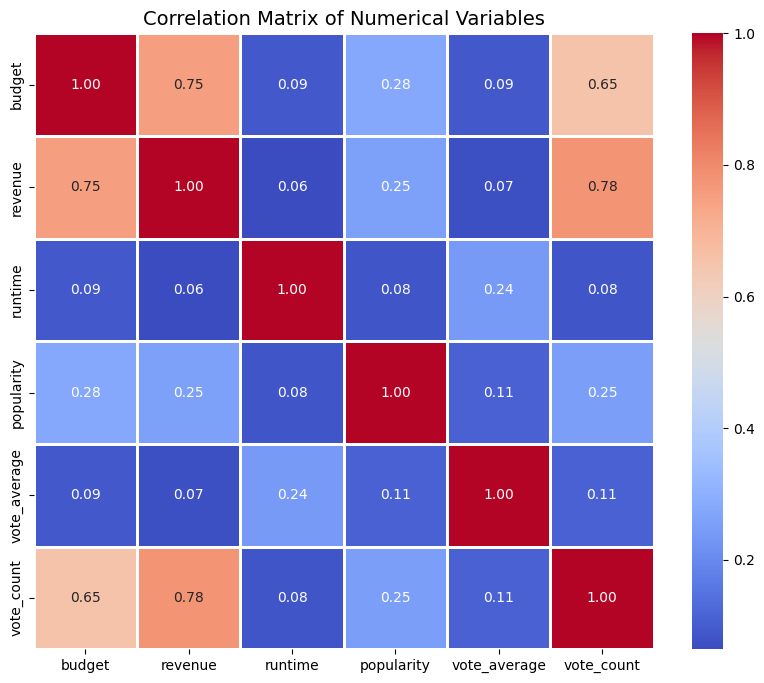

In [65]:
#popularity vs vote average

numerical_columns = ["budget", "revenue", "runtime", "popularity", "vote_average", "vote_count"]

corr_matrix = df_released[numerical_columns].corr()

corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

plt.title("Correlation Matrix of Numerical Variables", fontsize=14)
plt.show()

2. Time Based Analysis

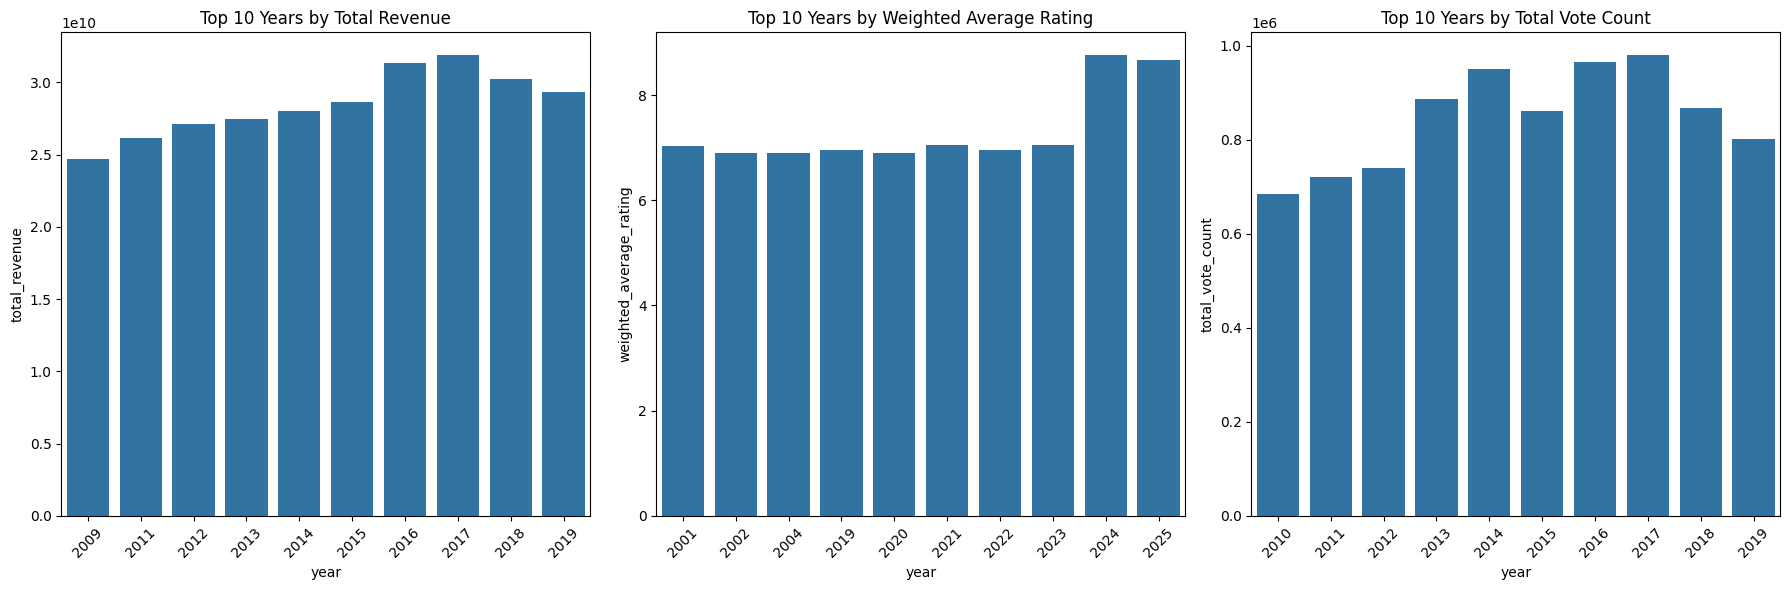

In [66]:
#most successful years(revenue, vote count, average ratings)

df_released["year"] = df_released["release_date"].dt.year
df_released["month"] = df_released["release_date"].dt.month

# Use the 'vote_count' from the original DataFrame within the aggregation
yearly_data = df_released.groupby("year").agg(
    weighted_average_rating=("vote_average", lambda x: (x * df_released.loc[x.index, "vote_count"]).sum() / df_released.loc[x.index, "vote_count"].sum() if df_released.loc[x.index, "vote_count"].sum() > 0 else 0),
    total_revenue=("revenue", "sum"),
    total_vote_count=("vote_count", "sum")
).reset_index()

yearly_data = yearly_data[yearly_data["year"] >= 2000]

top_years_revenue = yearly_data.sort_values(by="total_revenue", ascending=False)
top_years_rating = yearly_data.sort_values(by="weighted_average_rating", ascending=False)
top_years_votes = yearly_data.sort_values(by="total_vote_count", ascending=False)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x="year", y="total_revenue", data=top_years_revenue.head(10))
plt.title("Top 10 Years by Total Revenue")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x="year", y="weighted_average_rating", data=top_years_rating.head(10))
plt.title("Top 10 Years by Weighted Average Rating")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x="year", y="total_vote_count", data=top_years_votes.head(10))
plt.title("Top 10 Years by Total Vote Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\2927253984.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_data = df_released.groupby("month").apply(


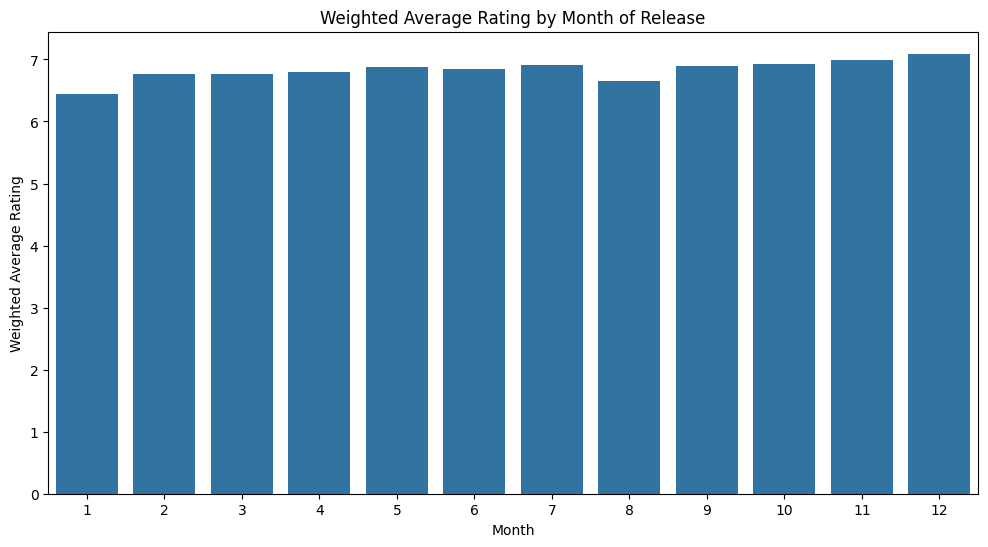

In [67]:
#movies released in certain months or seasons in terms of performance in terms of ratings


#by month
monthly_data = df_released.groupby("month").apply(
    lambda x: pd.Series({
        "weighted_average_rating": (x["vote_average"] * x["vote_count"]).sum() / x["vote_count"].sum() if x["vote_count"].sum() > 0 else 0
    })
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="weighted_average_rating", data=monthly_data)
plt.title("Weighted Average Rating by Month of Release")
plt.xlabel("Month")
plt.ylabel("Weighted Average Rating")
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\633233616.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_data = df_released.groupby("season").apply(


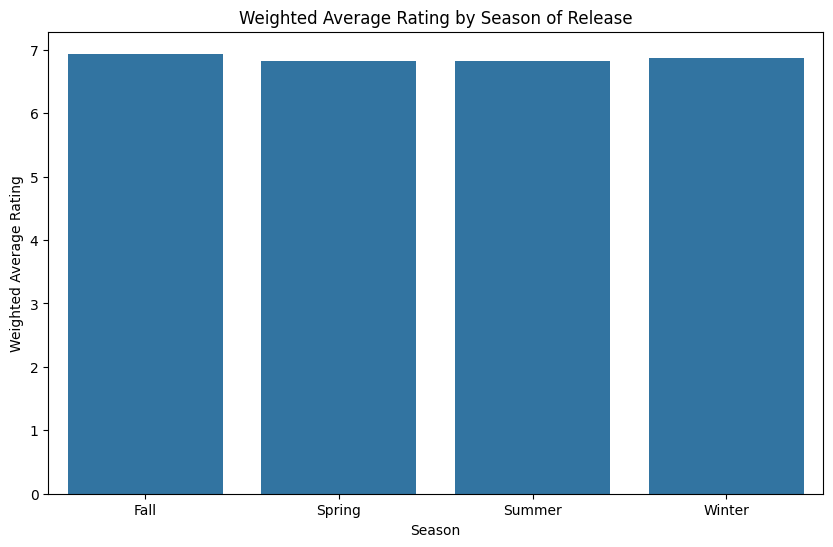

In [68]:
#by season

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df_released["season"] = df_released["month"].apply(get_season)

seasonal_data = df_released.groupby("season").apply(
    lambda x: (x["vote_average"] * x["vote_count"]).sum() / x["vote_count"].sum() if x["vote_count"].sum() > 0 else 0
).reset_index(name="weighted_average_rating")

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='weighted_average_rating', data=seasonal_data)
plt.title('Weighted Average Rating by Season of Release')
plt.xlabel('Season')
plt.ylabel('Weighted Average Rating')
plt.show()


The average ratings per time frame are calculated using a weighted average to reduce the impact of outliers, such as movies with few votes but high average ratings, or vice versa. By giving more weight to movies with a higher vote count, this method ensures that the ratings from more widely-voted films have a greater influence on the overall average, providing a more accurate reflection of the group's true ratings.<br>
This priority to movies with higher vote count also means that the years or months where the website TMDB has had more active users tend to have higher average ratings.

3. Genre Analysis

In [69]:
#top genres based on average ratings

#using only released movies for this part of the analysis as average ratings can only be obtained for released movies, this also prevents the influence of outliers

df_genres = df_released.explode("genres")

df_genres = df_genres[df_genres["genres"].notna()]

#exploding the df in terms of genres makes it such that if a movie has 6 genres listed, the new df will have 6 entries for that movie with only the genre changed

In [70]:
df_genres["genres"].unique()

array(['Action', 'Science Fiction', 'Adventure', 'Drama', 'Crime',
       'Thriller', 'Fantasy', 'Comedy', 'Romance', 'Western', 'Mystery',
       'War', 'Animation', 'Family', 'Horror', 'Music', 'History',
       'TV Movie', 'Documentary'], dtype=object)

In [71]:
#calculating weighted average rating per genre

genre_ratings = (
    df_genres.groupby("genres")
    .apply(lambda x: (x["vote_average"] * x["vote_count"]).sum() / x["vote_count"].sum())
    .reset_index(name="weighted_average_rating")
)

#sorting by ratings to get top rated genres

top_genres = genre_ratings.sort_values(by= "weighted_average_rating", ascending=False)

#top 10 genres
top_genres.head(10)

C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\1755816238.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["vote_average"] * x["vote_count"]).sum() / x["vote_count"].sum())


,genres,weighted_average_rating
17,War,7.311604
9,History,7.255265
2,Animation,7.155292
6,Drama,7.114524
11,Music,7.106628
4,Crime,7.005640
18,Western,6.967322
5,Documentary,6.947725
1,Adventure,6.941922
7,Family,6.929380


In [72]:
#most highly rated genre and least highly rated genre

highest_rated_genre = top_genres.iloc[0]

lowest_rated_genre = top_genres.iloc[-1]

print("Highest Rated Genre:", highest_rated_genre["genres"], "with rating:", highest_rated_genre["weighted_average_rating"])
print("Lowest Rated Genre:", lowest_rated_genre["genres"], "with rating:", lowest_rated_genre["weighted_average_rating"])


Highest Rated Genre: War with rating: 7.3116044878343045
Lowest Rated Genre: Horror with rating: 6.3278833588565595


In [73]:
df_genres_valid = df_genres[(df_genres['budget'] > 0) & (df_genres['revenue'] > 0)]

# Calculate weighted mean budget and revenue
genre_budget_revenue = df_genres_valid.groupby("genres").agg(
    weighted_mean_budget=("budget", lambda x: np.average(x, weights=x)),
    weighted_mean_revenue=("revenue", lambda x: np.average(x, weights=x))
).reset_index()

# Sort by weighted mean budget
high_budget_genres = genre_budget_revenue.sort_values(by="weighted_mean_budget", ascending=False)

print(high_budget_genres['genres'])


18            Western
14    Science Fiction
1           Adventure
0              Action
8             Fantasy
2           Animation
7              Family
16           Thriller
17                War
4               Crime
3              Comedy
12            Mystery
9             History
6               Drama
13            Romance
11              Music
10             Horror
5         Documentary
15           TV Movie
Name: genres, dtype: object


4. Production Insights

In [74]:
#the most successful production companies

df_companies = df[["production_companies", "vote_average", "vote_count", "revenue"]].copy()

df_companies = df_companies.explode("production_companies")

company_votes = df_companies.groupby("production_companies")["vote_count"].sum().reset_index()
company_votes = company_votes.rename(columns={"vote_count": "total_votes"})

df_companies = df_companies.merge(company_votes, on="production_companies")

vote_threshold = 10000 #vote threshold of 10k votes to remove outliers
df_companies = df_companies[df_companies["total_votes"] >= vote_threshold]

df_companies["weighted_vote"] = df_companies["vote_average"] * df_companies["vote_count"]

company_success = df_companies.groupby("production_companies").agg(
    weighted_sum_vote=("weighted_vote", "sum"),
    total_vote_count=("vote_count", "sum"),
    total_revenue=("revenue", "sum")
).reset_index()

company_success["weighted_mean_vote"] = company_success["weighted_sum_vote"] / company_success["total_vote_count"]

successful_companies = company_success.sort_values(by=["weighted_mean_vote", "total_revenue"], ascending=False)

print(successful_companies[["production_companies", "weighted_mean_vote", "total_revenue"]].head(10))


             production_companies  weighted_mean_vote  total_revenue
38             Alfran Productions            8.706962      245066411
463           Knickerbocker Films            8.438000      100853753
76            Atman Entertainment            8.428025      100853753
884       The Saul Zaentz Company            8.387718     2979311757
165          Cecchi Gori Pictures            8.358414      327311859
887  The Turman-Morrissey Company            8.338189       23875127
871           The Coppola Company            8.337527      247020000
966    Wendy Finerman Productions            8.336090      834223055
885       The Steve Tisch Company            8.336061      830200665
492          Les Films du Dauphin            8.312770       45284974


Alfran Productions is known for producing The Godfather trilogy, while The Saul Zaentz Company was behind The Lord of the Rings films. The production companies listed here have been responsible for some of the most critically acclaimed and widely regarded greatest films of all time.

In [75]:
#production countries with the highest rated movies

df_countries = df[["production_countries", "vote_average", "vote_count", "revenue"]].copy()

df_countries = df_countries.explode("production_countries")

country_votes = df_countries.groupby("production_countries")["vote_count"].sum().reset_index()
country_votes = country_votes.rename(columns={"vote_count": "total_votes"})

df_countries = df_countries.merge(country_votes, on="production_countries")

vote_threshold = 10000
df_countries = df_countries[df_countries["total_votes"] >= vote_threshold]

df_countries["weighted_vote"] = df_countries["vote_average"] * df_countries["vote_count"]

country_success = df_countries.groupby("production_countries").agg(
    weighted_sum_vote=("weighted_vote", "sum"),
    total_vote_count=("vote_count", "sum"),
    total_revenue=("revenue", "sum")
).reset_index()

country_success["weighted_mean_vote"] = country_success["weighted_sum_vote"] / country_success["total_vote_count"]

successful_countries = country_success.sort_values(by=["weighted_mean_vote", "total_revenue"], ascending=False)

print(successful_countries[["production_countries", "weighted_mean_vote", "total_revenue"]].head(10))


        production_countries  weighted_mean_vote  total_revenue
32               New Zealand            7.589674     8822450633
41               South Korea            7.298752     4927543741
22                      Iran            7.203346       73913550
46                    Taiwan            7.174637     2080826821
42              Soviet Union            7.056679        8908266
50            United Kingdom            7.022601    93457241362
4                     Brazil            7.005182     1627261116
26                     Japan            6.984681    16737489988
51  United States of America            6.891032   616367455775
2                    Austria            6.885339      420306215


New Zealand leads with a 7.59 weighted mean vote and $8.82 billion in revenue, largely thanks to The Lord of the Rings. South Korea follows with $4.93 billion in revenue and critically acclaimed films like Parasite. Iran, Taiwan, and the Soviet Union also perform well in critical reception, despite lower revenues.<br>
The United States and United Kingdom lead in revenue, with $616.37 billion and $93.46 billion, but their weighted votes are lower due to the sheer number of films produced, which can dilute the average rating. In contrast, smaller film industries, with fewer films but higher critical acclaim, tend to have higher weighted votes.

In [76]:
#hollywood vs non hollywood films

hollywood_vs_non = country_success.copy()
hollywood_vs_non["is_hollywood"] = hollywood_vs_non["production_countries"] == "United States of America"

hollywood_vs_non = hollywood_vs_non.groupby("is_hollywood").agg(
    weighted_mean_vote=("weighted_mean_vote", "mean"),
    total_revenue=("total_revenue", "sum")
).reset_index()

hollywood_vs_non["is_hollywood"] = hollywood_vs_non["is_hollywood"].map({True: "Hollywood (USA)", False: "Non-Hollywood"})

print(hollywood_vs_non)

      is_hollywood  weighted_mean_vote  total_revenue
0    Non-Hollywood            6.702937   324856573614
1  Hollywood (USA)            6.891032   616367455775


Hollywood dominates the global film industry, nearly doubling the total revenue of all other film industries combined. Its vast budgets, worldwide distribution, and marketing power ensure both financial success and broad audience appeal. While non-Hollywood films can achieve high critical acclaim, their overall impact is limited by smaller markets and fewer high-budget productions.

5. Language & Status analysis

In [77]:
df['is_english'] = df['original_language'].apply(lambda x: 1 if x == 'en' else 0)

language_vote_avg = df.groupby('is_english').apply(
    lambda x: (x['vote_average'] * x['vote_count']).sum() / x['vote_count'].sum()
).reset_index(name='weighted_mean_vote_average')

language_vote_avg['is_english'] = language_vote_avg['is_english'].map({1: 'English', 0: 'Non-English'})

status_vote_avg = df.groupby('status').apply(
    lambda x: (x['vote_average'] * x['vote_count']).sum() / x['vote_count'].sum()
).reset_index(name='weighted_mean_vote_average')

print("Language Weighted Vote Average Analysis:\n", language_vote_avg)
print("\nStatus Weighted Vote Average Analysis:\n", status_vote_avg)


Language Weighted Vote Average Analysis:
     is_english  weighted_mean_vote_average
0  Non-English                    6.788609
1      English                    6.871595

Status Weighted Vote Average Analysis:
             status  weighted_mean_vote_average
0         Canceled                         NaN
1    In Production                         NaN
2          Planned                         NaN
3  Post Production                         NaN
4         Released                    6.860528
5          Rumored                         NaN


C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\3903981266.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  language_vote_avg = df.groupby('is_english').apply(
C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\3903981266.py:10: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: (x['vote_average'] * x['vote_count']).sum() / x['vote_count'].sum()
C:\Users\ROG\AppData\Local\Temp\ipykernel_36428\3903981266.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly 

In [78]:
#checking if the movies in status other than "released" have vote count = 0 or vote average = 0 to explain why the result was NaN earlier

print(df.groupby('status')['vote_count'].sum())
print(df.groupby('status')['vote_average'].sum())


status
Canceled                  0
In Production             0
Planned                   0
Post Production           0
Released           19780908
Rumored                   0
Name: vote_count, dtype: int64
status
Canceled                 0.000
In Production            0.000
Planned                  0.000
Post Production          0.000
Released           1145487.699
Rumored                  0.000
Name: vote_average, dtype: float64


The vote averages for English and non-English movies are nearly the same, as expected. Similarly, movies without a 'Released' status have no votes, since audiences must see a movie before they can rate it.

## Conclusion of the EDA task<br>

A weighted average accounts for both individual values and their significance, making it more reliable than a simple mean. In this analysis, it was necessary to prevent bias from movies with very few votes, which could disproportionately affect rankings. By weighting ratings based on vote counts, we ensured that widely rated films had a greater influence, leading to fairer comparisons across genres, production companies, languages, and other factors. This approach helped balance popularity and critical reception, providing a more accurate picture of trends in the movie industry.<br>
The result is also more "fair," as when comparing ratings among different production companies and countries, the scope is entirely different. A simple mean would always favor categories with fewer highly rated movies rather than those with larger catalogs but more varied reception.

## Making a prediction model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#copy of the cleaned data frame
df_copy = df.copy()

#adding a 'release_year' column
df_copy["release_year"] = df_copy["release_date"].dt.year

#filter only 'released' status and drop the status column
df_copy = df_copy[df_copy["status"] == "Released"]
df_copy = df_copy.drop(columns="status")

#log-transform skewed features: 'revenue' and 'budget'
df_copy['log_revenue'] = np.log1p(df_copy['revenue'])
df_copy['log_budget'] = np.log1p(df_copy['budget'])

#exploding the df for genres
df_copy_exploded = df_copy.explode("genres")

#one-hot encoding on the exploded genre column
genre_dummies = df_copy_exploded["genres"].str.get_dummies(sep=", ")

#concatenating the dummies back to the exploded DataFrame
df_copy_exploded = pd.concat([df_copy_exploded, genre_dummies], axis=1)

#defining features and target
X = df_copy_exploded.drop(columns=["vote_average", "id", "title", "production_countries", "production_companies", "original_language", "revenue", "budget"])
y = df_copy_exploded["vote_average"]  #target

numerical_cols = ["vote_count", "log_revenue", "log_budget", "runtime", "popularity", "release_year"]

#one-hot encoding the categorical, and scaling the numerical data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols)
])

#define the full model pipeline using RandomForestRegressor
model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))

#splitting the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print the results
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


MAE: 0.4200, RMSE: 0.8795, R2: 0.9138


## Conclusion form Prediction Model<br>
This particular implementation is the 3rd iteration of the model with previous two models having performance outputs: 
<ul>a) MAE: 2.7066, RMSE: 9.1675, R2: 0.1019 </ul>
<ul>b) MAE: 2.2029, RMSE: 2.7304, R2: 0.1525</ul>

First Iteration:<br>
The first implementation used Linear Regression with One-Hot Encoding on all categorical features, including exploded genres, production companies, and production language. This model took all the categories into account without any feature engineering.<br>
Second Iteration:<br>
In the second iteration, I dropped all categorical columns except for genres. This approach allowed the model to focus on a simpler feature set, but performance remained somewhat similar.<br>
Third Iteration:<br>
The third iteration involved using Random Forest Regressor, applying log-transformation to the skewed revenue and budget features, and dropping all categorical columns. This model improved performance significantly, with a notable increase in $R^2$ (0.9138), indicating a much better fit to the data.<br>
## Understanding $R^2$
$R^2$ or R-squared, s a statistical measure that represents the proportion of the varieance in the dependent varible(in this case, the movie ratings) that is explained by the independent variables(features) in the model. Mathematically, $R^2$ is defined as:

$$
R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}}
$$

Where:
- SS_residual is the sum of the squared differences between the predicted and actual values.
- SS_total is the total sum of squares, or the sum of squared differences between the actual values and the mean of the actual values.

<b>Why is higher $R^2$ better?</b><br>
$R^2$ ranges from 0 to 1 a higher value of $R^2$ indicates that the modle is able to explain a larger proportion of the variance in the target variable. This means that model's predictions are closer to the actual values, and capturing the underlying patterns in the data. So, in this context in the final iteration the $R^2$ score of 0.9138 means 91.38% of the variance in the movie ratings is explained by the features included in the model. This is a very strong result, indicating the model does a good job of predicting movie ratings based on the availaible features.<br>
## How is the last iteration much better?
In the final iteration, the improvements come from two key modifications:<br>
1. <b>Log-Transformation of Skewed Features:</b> By applying a log-transformation to the revenue and budget features, we reduced the skewness in these variables. Skewed features can heavily influence model performance, especially for models like linear regression, which are sensitive to outliers and non-normal distributions. This transformation helps normalize these features, leading to better model performance by stabilizing variance and reducing the impact of extreme values.<br>
2. <b>Random Forest Regressor:</b> Switching to a Random Forest Regressor from Linear Regression also contributed significantly to the model’s improvement. Random Forests are much more flexible and capable of capturing complex, non-linear relationships within the data. They can handle interactions between features without needing explicit specification, unlike linear regression, which assumes linearity between input features and the target variable. This flexibility allows the Random Forest model to better adapt to the data and capture more nuanced patterns.<br>

These changes led to a significant increase in the $R^2$ score, from about 0.1 to over 0.91.